In [1]:
from sequenzo import *
import pandas as pd

## 

In [2]:
# ------------------------
# Step 0: 定义提取工具函数
# ------------------------

def extract_state_space(sequences):
    return sorted(set(s for seq in sequences for s in seq))

# ------------------------
# Step 1: 读取和准备数据
# ------------------------

df = pd.read_csv("/Users/lei/Documents/Sequenzo_all_folders/sequenzo_local/test_data/real_data_my_paper/detailed_sequence_10_work_years_df.csv")

time_cols = [f"C{i}" for i in range(1, 11)]  # C1~C10

# 假设 'country' 是一列，值为 'India' 或 'US'
india_df = df[df["country"] == "india"].copy()
us_df = df[df["country"] == "us"].copy()

T = len(time_cols)  # 一般是固定 10

# 提取 sequence 列
india_sequences = extract_sequences(india_df, time_cols)
us_sequences = extract_sequences(us_df, time_cols)

india_states = extract_state_space(india_sequences)
us_states = extract_state_space(us_sequences)

# ------------------------
# Step 2: 构建前缀树
# ------------------------

india_tree = build_prefix_tree(india_sequences)
us_tree = build_prefix_tree(us_sequences)

# 为每个国家分别建模
india_model = IndividualDivergence(india_sequences)
us_model = IndividualDivergence(us_sequences)

In [3]:
print('india_tree:', india_tree)
print('us_tree:', us_tree)

india_tree: PrefixTree(max_depth=10, total_prefixes=5804)
us_tree: PrefixTree(max_depth=10, total_prefixes=5517)


In [4]:
df

,worker_id,gender,country,cohort,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,dilip-kumar-nath-7538746a,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
1,vinodkumar-yadav-b7a976107,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
2,josh-slosson-07a1509,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
3,jonatthan-rodriguez-8a5612121,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
4,jeenesh-jyothindran-8ba28818,male,india,11-20 total work years,software,software,software,software,software,software,software,software,software,software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38897,nan-jiang-743a9863,female,us,0-10 total work years,software,software,software,software,software,software,software,software,software,software
38898,tina-pava-4846207,female,us,21-30 total work years,software,software,software,software,software,software,software,software,software,software
38899,sariandoni,female,us,21-30 total work years,support & test,software,software,software,software,software,software,research,research,research
38900,nancy-jain-a8723460,female,us,0-10 total work years,software,software,software,software,software,support & test,software,software,software,software


In [5]:
india_prefix_counts = compute_prefix_count(india_tree, T)
india_branching_factors = compute_branching_factor(india_tree, T)
india_js_scores = compute_js_divergence(india_sequences, state_set=india_states)

us_prefix_counts = compute_prefix_count(us_tree, T)
us_branching_factors = compute_branching_factor(us_tree, T)
us_js_scores = compute_js_divergence(us_sequences, state_set=us_states)

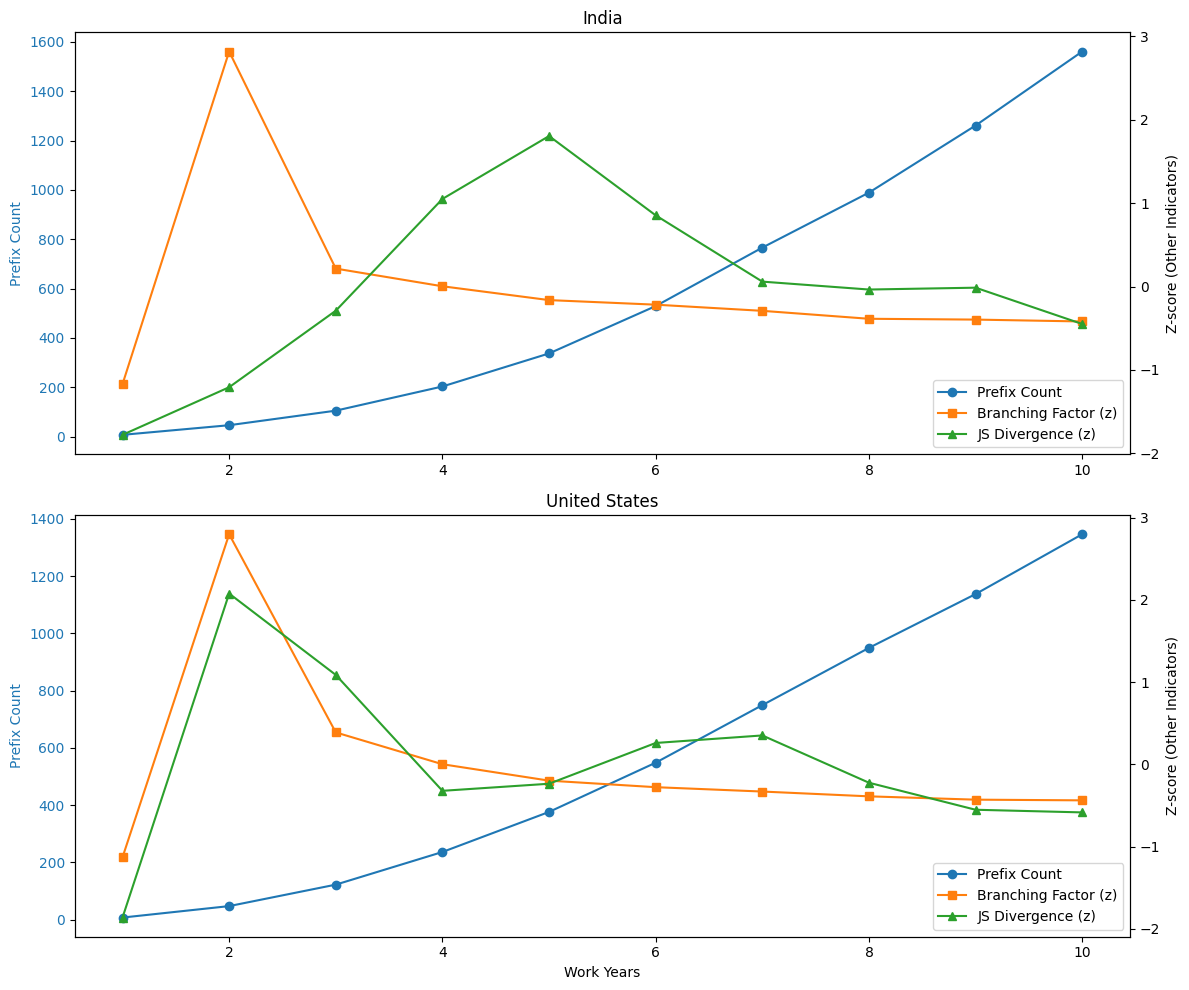

✅ 已生成带有自定义标题的对比图


<Figure size 640x480 with 0 Axes>

In [12]:
# 演示自定义子图标题功能
# 使用完全自定义的标题

# 准备两组数据
custom_groups_data = {
    "IND": {
        "prefix_counts": india_prefix_counts,
        "branching_factors": india_branching_factors,
        "js_scores": india_js_scores
    },
    "USA": {
        "prefix_counts": us_prefix_counts,
        "branching_factors": us_branching_factors,
        "js_scores": us_js_scores
    }
}

# 使用自定义子图标题
plot_system_indicators_multiple_comparison(
    groups_data=custom_groups_data,
    group_names=["India", "United States"],  # 这个仅用于默认标题格式，当有subplot_titles时会被覆盖
    subplot_titles=[
        "India", 
        "United States"
    ],  # 完全自定义的子图标题
    x_values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # 可以是年份、时期等
    x_label="Work Years",  # 自定义x轴标签
    legend_loc='lower right',  # 图例位置
    save_as="custom_titles_comparison"
)

print("✅ 已生成带有自定义标题的对比图")
